In [60]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb
from keras.models import load_model
from lorenz_gan.gan import Split1D, Scale
import keras.backend as K
from os.path import join

In [2]:
ls /Users/dgagne/data/exp_20_stoch/


gan_X_scaling_values_0000.csv       gan_generator_0302_epoch_0007.h5
gan_X_scaling_values_0100.csv       gan_generator_0302_epoch_0008.h5
gan_X_scaling_values_0101.csv       gan_generator_0302_epoch_0009.h5
gan_X_scaling_values_0102.csv       gan_generator_0302_epoch_0010.h5
gan_X_scaling_values_0103.csv       gan_generator_0302_epoch_0011.h5
gan_X_scaling_values_0202.csv       gan_generator_0302_epoch_0012.h5
gan_X_scaling_values_0203.csv       gan_generator_0302_epoch_0013.h5
gan_X_scaling_values_0300.csv       gan_generator_0302_epoch_0014.h5
gan_X_scaling_values_0301.csv       gan_generator_0302_epoch_0015.h5
gan_X_scaling_values_0302.csv       gan_generator_0302_epoch_0016.h5
gan_X_scaling_values_0303.csv       gan_generator_0302_epoch_0017.h5
gan_X_scaling_values_0402.csv       gan_generator_0302_epoch_0018.h5
gan_X_scaling_values_0403.csv       gan_generator_0302_epoch_0019.h5
gan_X_scaling_values_0500.csv       gan_generator_0302_epoch_0020.h5
gan_X_scaling_values_0501.csv     

In [80]:
model_path = "/Users/dgagne/data/exp_20_stoch/"
model = load_model(join(model_path, "gan_generator_0500_epoch_0030.h5"), 
                   custom_objects={"Split1D":Split1D, "Scale":Scale})

In [5]:
model.layers

In [115]:
x_input = np.arange(-5, 5, 0.1)
u_input = np.arange(-5, 4, 0.1)
gans = np.array([500, 501, 502, 503])
u_out = np.zeros((len(gans), u_input.size, x_input.size))
for g, gan in enumerate(gans):
    print(gan)
    model = load_model(join(model_path, f"gan_generator_{gan:04d}_epoch_0005.h5"), 
                   custom_objects={"Split1D":Split1D, "Scale":Scale})
    for i, x in enumerate(x_input):
        for j, u in enumerate(u_input):
            u_out[g, j, i] = model.predict([np.array([[x, u]]), np.ones((1, 17)) * 1])


500
501
502
503


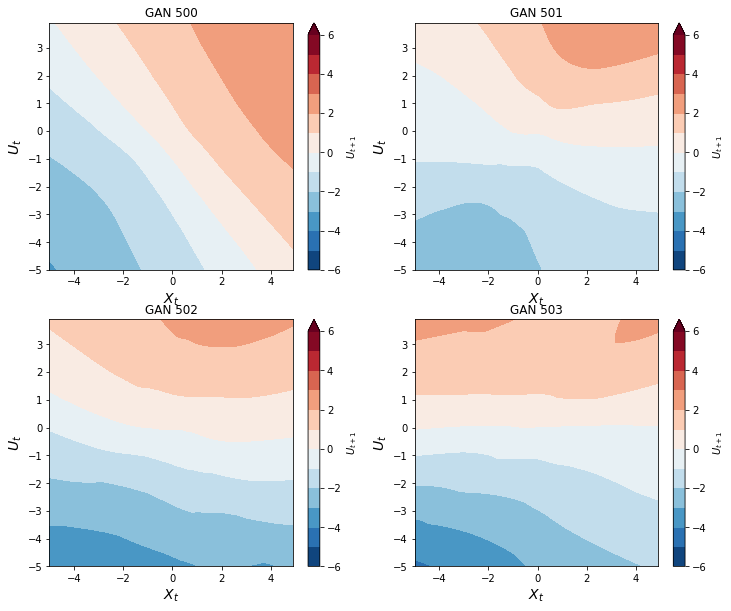

In [116]:
plt.figure(figsize=(12, 10))
for i in range(1, 5):
    plt.subplot(2, 2, i)
    plt.contourf(x_input, u_input, u_out[i-1], np.arange(-6, 7), cmap="RdBu_r", extend="max", )
    plt.xlabel("$X_t$", fontsize=14)
    plt.ylabel("$U_t$", fontsize=14)
    plt.title(f"GAN {gans[i-1]:03d}")
    plt.colorbar(label="$U_{t+1}$", )
plt.savefig("gan_500_series_x_u_out_space.png", dpi=200, bbox_inches="tight")

0
10
20
30
40
50
60
70
80


Text(0, 0.5, '$U_{t+1}$')

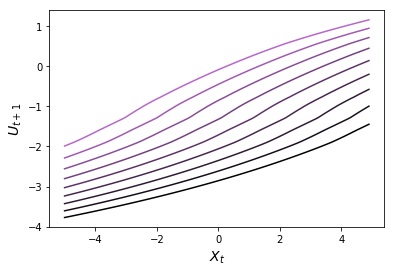

In [84]:
for i in range(0, u_out.shape[0], 10):
    print(i)
    plt.plot(x_input, u_out[i], color=hsv_to_rgb((0.8,  0.5,  i / u_out.shape[1])))
plt.xlabel("$X_t$", fontsize=14)
plt.ylabel("$U_{t+1}$", fontsize=14)

Text(0, 0.5, '$U_t+1$')

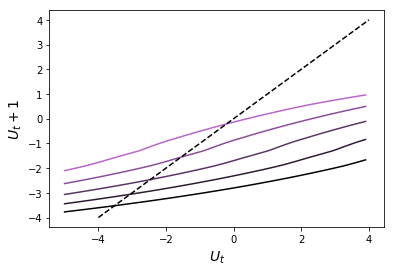

In [83]:
for i in range(0, u_out.shape[0], 20):
    plt.plot(u_input, u_out[:, i], color=hsv_to_rgb((0.8,  0.5,  i / u_out.shape[1])))
plt.plot(np.arange(-4, 5), np.arange(-4, 5), 'k--')
plt.xlabel("$U_t$", fontsize=14)
plt.ylabel("$U_t+1$", fontsize=14)

In [102]:
x_input = np.arange(-5, 5, 0.1)
u_input = np.arange(-5, 4, 0.1)
gans = np.array([100, 101, 102, 103])
u_out = np.zeros((len(gans), u_input.size, x_input.size))
for g, gan in enumerate(gans):
    print(gan)
    model = load_model(join(model_path, f"gan_generator_{gan:04d}_epoch_0030.h5"), 
                   custom_objects={"Split1D":Split1D, "Scale":Scale})
    for i, x in enumerate(x_input):
        for j, u in enumerate(u_input):
            u_out[g, j, i] = model.predict([np.array([[x, u]]), np.ones((1, 1)) * -2])

100
101
102
103


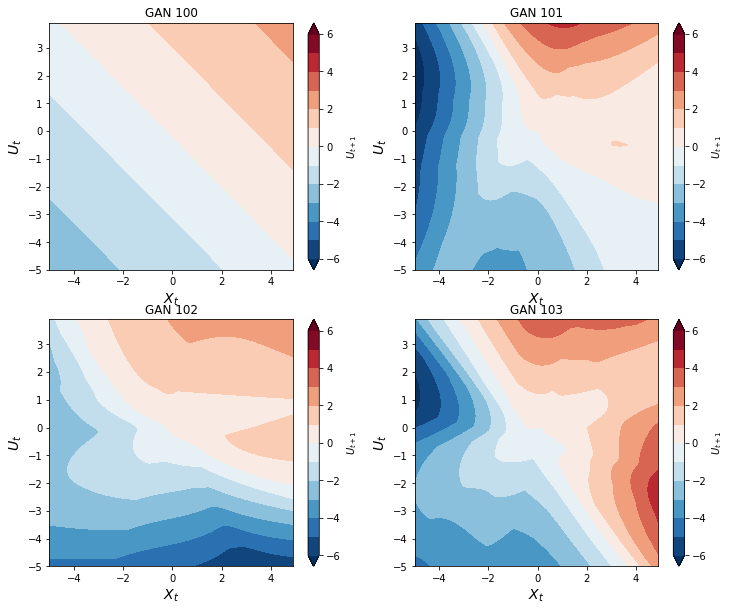

In [103]:
plt.figure(figsize=(12, 10))
for i in range(1, 5):
    plt.subplot(2, 2, i)
    plt.contourf(x_input, u_input, u_out[i-1], np.arange(-6, 7), 
                 cmap="RdBu_r", vmin=-6, vmax=6, extend="both")
    plt.xlabel("$X_t$", fontsize=14)
    plt.ylabel("$U_t$", fontsize=14)
    plt.title(f"GAN {gans[i-1]:03d}")
    plt.colorbar(label="$U_{t+1}$", )
plt.savefig("gan_100_series_x_u_out_space.png", dpi=200, bbox_inches="tight")

In [112]:
sess = K.get_session()
sess.run(model.layers[-1].gamma)

array([1.3803892], dtype=float32)